# Afya Intelligence Data Science Challenge

## Objective

Develop a forecasting model to predict future demand for healthcare product sales in Tanzania for the next 6 months starting from June 2024.

## Task 1: Data Exploration and Cleaning



### Data Exploration
First, we'll load and examine the dataset to understand its structure, identify data types, and detect any immediate issues.

In [248]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [249]:
# Load the dataset
file_path = '/content/sample_data/DATASET.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,October,2023,577098.0
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,February,2024,1005058.0
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,February,2023,436704.0
3,ilala pharmacy,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),March,2023,NaN
4,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,August,2023,NaN


In [250]:
# Summary statistics
df.describe()

,Year,Sales
count,450.000000,3.510000e+02
mean,2023.333333,4.762346e+05
std,0.471929,3.488904e+05
min,2023.000000,6.040829e+00
25%,2023.000000,5.900000e+04
50%,2023.000000,5.168630e+05
75%,2024.000000,7.363460e+05
max,2024.000000,1.400000e+06


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pharmacy Name  450 non-null    object 
 1   Product Code   445 non-null    object 
 2   Product Name   444 non-null    object 
 3   Month          450 non-null    object 
 4   Year           450 non-null    int64  
 5   Sales          351 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 21.2+ KB


### Cleaning Steps
a. Missing Values,
Identifying and handling missing values appropriately through removal or imputation.

b. Duplicate and Low Variation Data,
Checking for and remove\ing any duplicate rows and columns with low variation.

c. Incorrect and Irrelevant Data,
Spoting and correcting any incorrect or irrelevant data.

d. Categorical Data,
Transforming categorical data into a numerical format suitable for machine learning algorithms.

e. Outliers,
Detecting and handling outliers in the dataset.

f. Feature Scaling,
Apply scaling techniques to numerical features as needed.

g. Feature Engineering and Selection,
Creating or selecting the most informative features.

h. Validation Split,
Splitting the data into training and validation sets.

**Product Name and Product Code Mapping**

| Product Code | Product Name                                   |
|--------------|------------------------------------------------|
| 10010194AC   | LEVONORGESTREL IMPLANT 75MG                    |
| 10010106AC   | LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 MG (28) |
| 10010353AC   | LEVONORGESTREL TABLETS 0.75 mg (2TB)           |
| 10010108AC   | CONDOMS                                        |
| 40030134AC   | Copper T IUD                                   |

In [252]:
# Checking for missing values
missing_values = df.isnull().sum()

# Display missing values
missing_values[missing_values > 0]

Product Code     5
Product Name     6
Sales           99
dtype: int64

In [253]:
# Drop the 'Product Name' column
df = df.drop(columns=['Product Name'])

In [254]:
# Define a dictionary to map month names to their numeric values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map the 'Month' column to numeric values
df['Month'] = df['Month'].map(month_mapping)

# Create the 'Date' column in MM-YYYY format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

# Sort the DataFrame by 'Date' column ((Data frame was not well sortedin the chronological order))
df = df.sort_values(by='Date')

In [255]:
# Display the resulting DataFrame
df.head()

,Pharmacy Name,Product Code,Month,Year,Sales,Date
449,Kigamboni Pharmacy,10010108AC,1,2023,NaN,2023-01-01
156,UBUNGO PHARMACY,10010106AC,1,2023,824361.000000,2023-01-01
30,ilala pharmacy,10010106AC,1,2023,93.924291,2023-01-01
167,UBUNGO PHARMACY,10010108AC,1,2023,42.000000,2023-01-01
25,TEMEKE PHARMACY,10010106AC,1,2023,NaN,2023-01-01


In [256]:
# Remove rows with missing values (not a good choice due to the number of records - 450)
# df = df.dropna()

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Impute missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Impute missing values in non-numeric columns with the mode (most frequent value)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are still any missing values
print(df.isnull().sum())

Pharmacy Name    0
Product Code     0
Month            0
Year             0
Sales            0
Date             0
dtype: int64


In [257]:
df.duplicated().sum()

0

In [258]:
# Checking for low variation columns
low_variation_cols = [col for col in df.columns if df[col].nunique() <= 1]

low_variation_cols

[]

In [259]:
# Checking for incorrect or irrelevant data
# This step is often manual, requiring domain knowledge to identify such data

# Example: Ensuring no negative sales values
df = df[df['Sales'] >= 0]

In [260]:
df.shape

(450, 6)

In [261]:
df.head()

,Pharmacy Name,Product Code,Month,Year,Sales,Date
449,Kigamboni Pharmacy,10010108AC,1,2023,476234.616400,2023-01-01
156,UBUNGO PHARMACY,10010106AC,1,2023,824361.000000,2023-01-01
30,ilala pharmacy,10010106AC,1,2023,93.924291,2023-01-01
167,UBUNGO PHARMACY,10010108AC,1,2023,42.000000,2023-01-01
25,TEMEKE PHARMACY,10010106AC,1,2023,476234.616400,2023-01-01


#### Exploratory Data Analysis (EDA)

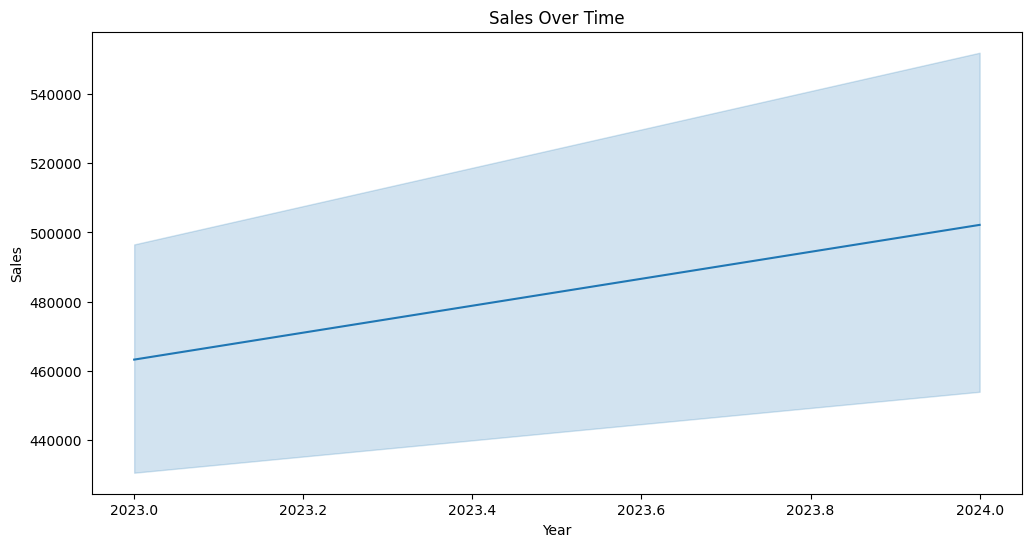

In [262]:
# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales', data=df)
plt.title('Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

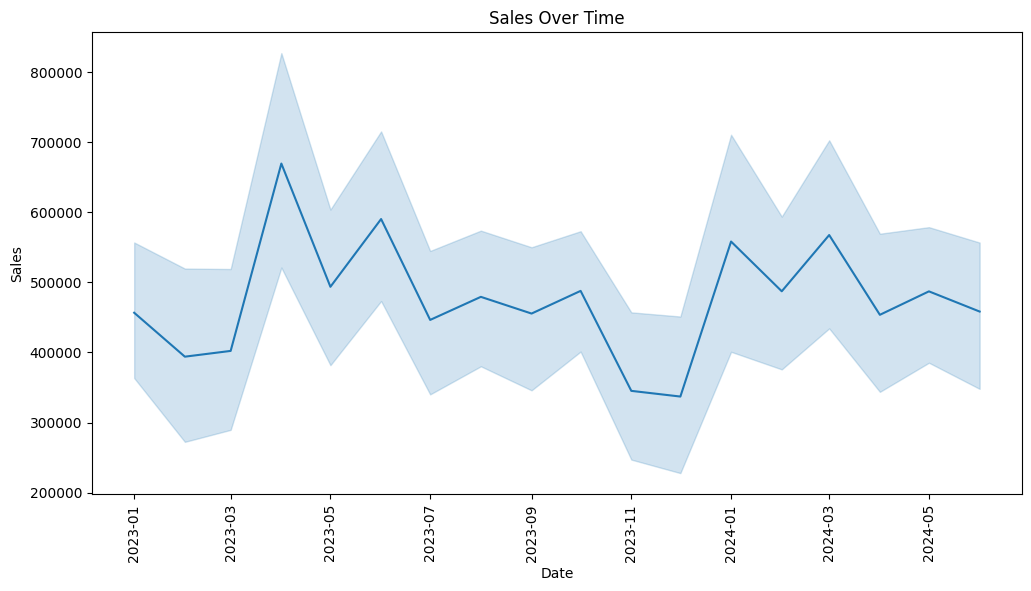

In [263]:
# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

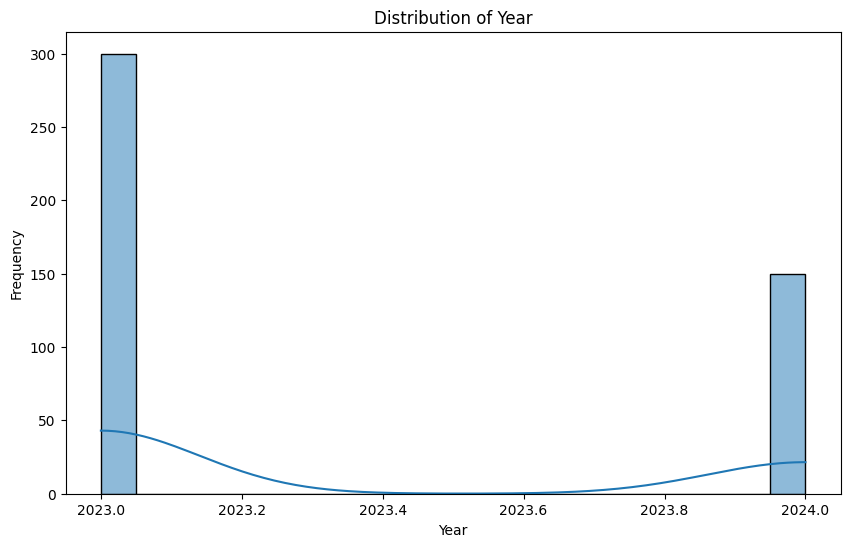

In [264]:
# Year distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

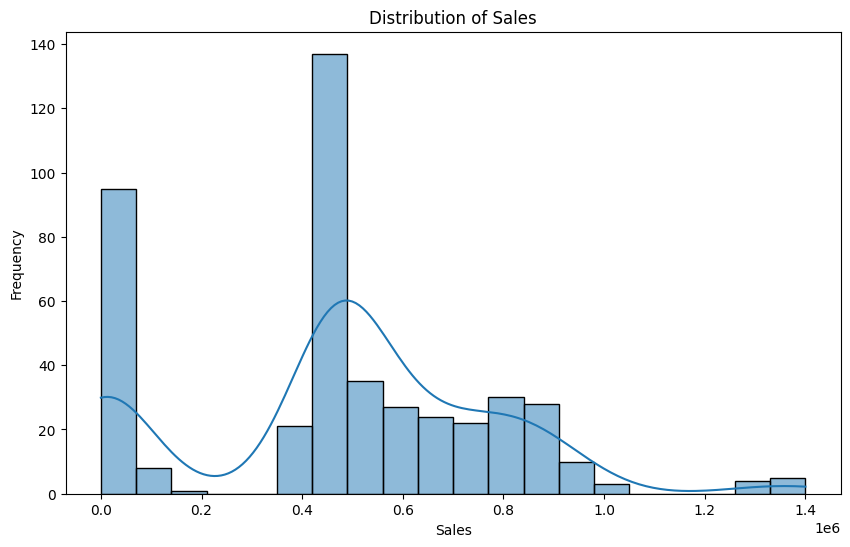

In [265]:
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

<ipython-input-266-f4c3c21929b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Pharmacy Name'], palette='viridis', order=df['Pharmacy Name'].value_counts().index)


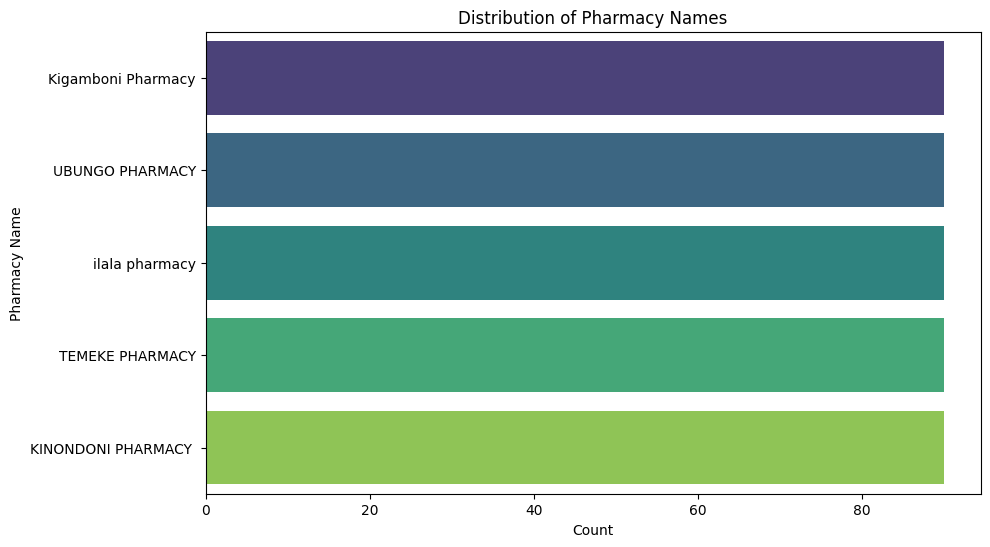

In [266]:
# Pharmacy Name distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Pharmacy Name'], palette='viridis', order=df['Pharmacy Name'].value_counts().index)
plt.title('Distribution of Pharmacy Names')
plt.xlabel('Count')
plt.ylabel('Pharmacy Name')
plt.show()

<ipython-input-267-426978b05bc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Product Code'], palette='viridis', order=df['Product Code'].value_counts().index)


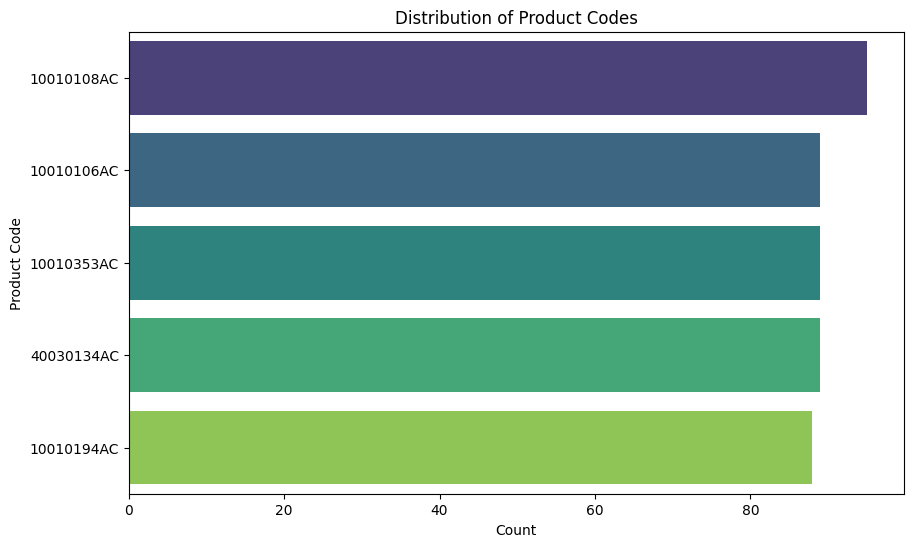

In [267]:
# Product Code distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Product Code'], palette='viridis', order=df['Product Code'].value_counts().index)
plt.title('Distribution of Product Codes')
plt.xlabel('Count')
plt.ylabel('Product Code')
plt.show()

##### Relationship plots

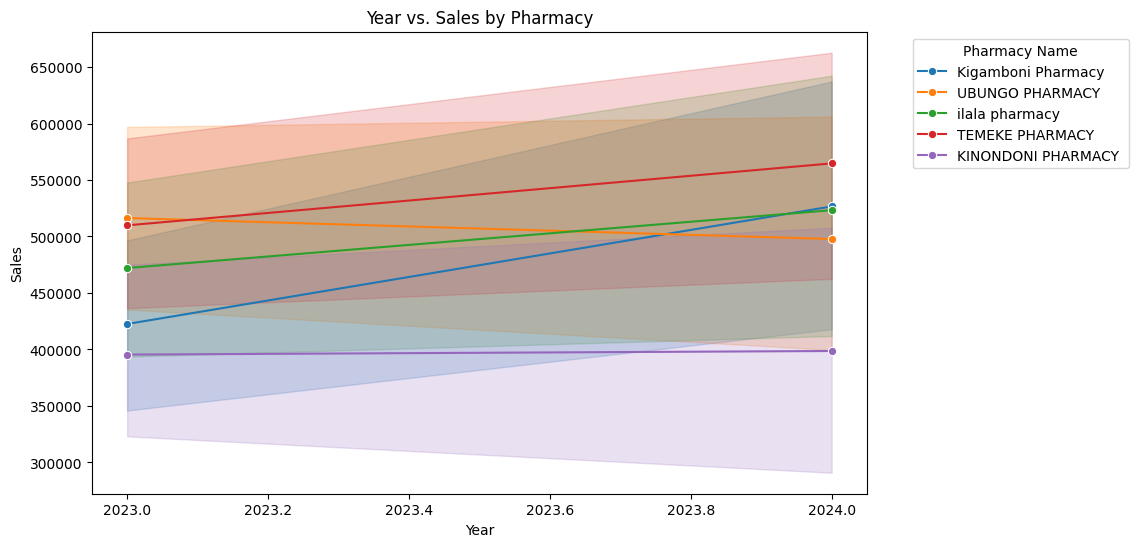

In [268]:
# Year vs. Sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Sales', hue='Pharmacy Name', palette='tab10', marker='o')
plt.title('Year vs. Sales by Pharmacy')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Pharmacy Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-269-2910a2ac6038>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Sales', y='Pharmacy Name', inner='stick', palette='tab10')


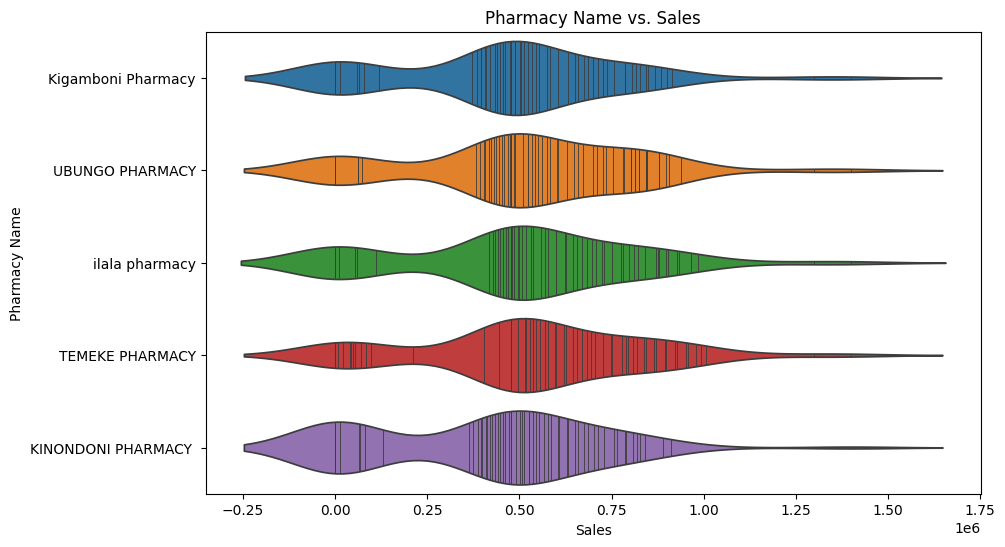

In [269]:
# Pharmacy Name vs. Sales
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Sales', y='Pharmacy Name', inner='stick', palette='tab10')
plt.title('Pharmacy Name vs. Sales')
plt.xlabel('Sales')
plt.ylabel('Pharmacy Name')
plt.show()

<ipython-input-270-94edc3467c93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Sales', y='Product Code', inner='stick', palette='tab10')


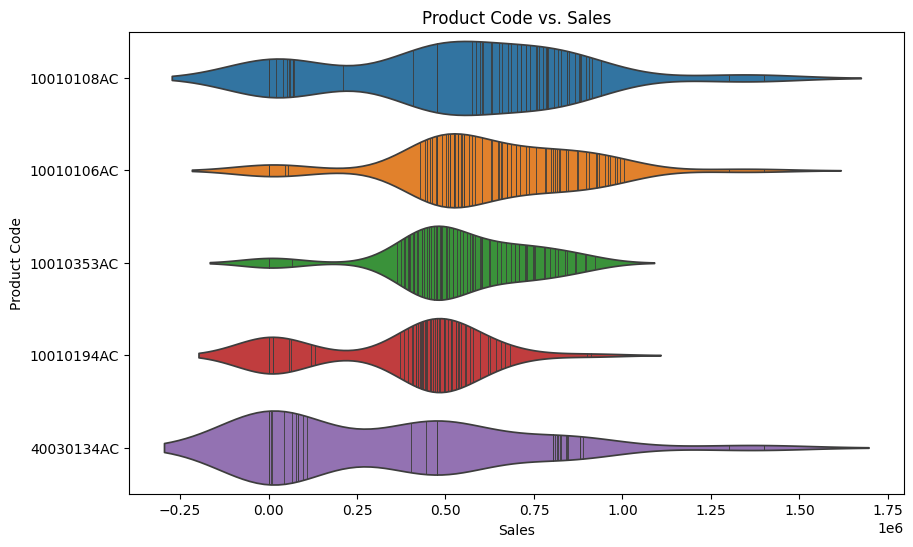

In [270]:
# Product Code vs. Sales
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Sales', y='Product Code', inner='stick', palette='tab10')
plt.title('Product Code vs. Sales')
plt.xlabel('Sales')
plt.ylabel('Product Code')
plt.show()

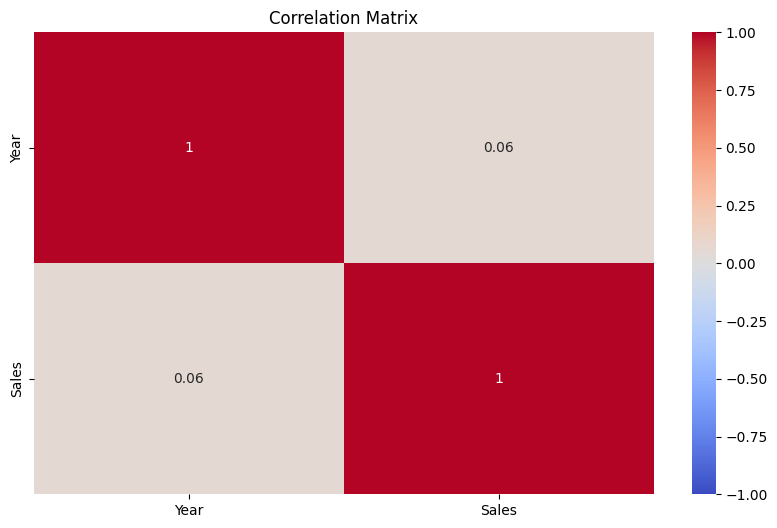

In [271]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
corr_matrix = df[['Year', 'Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

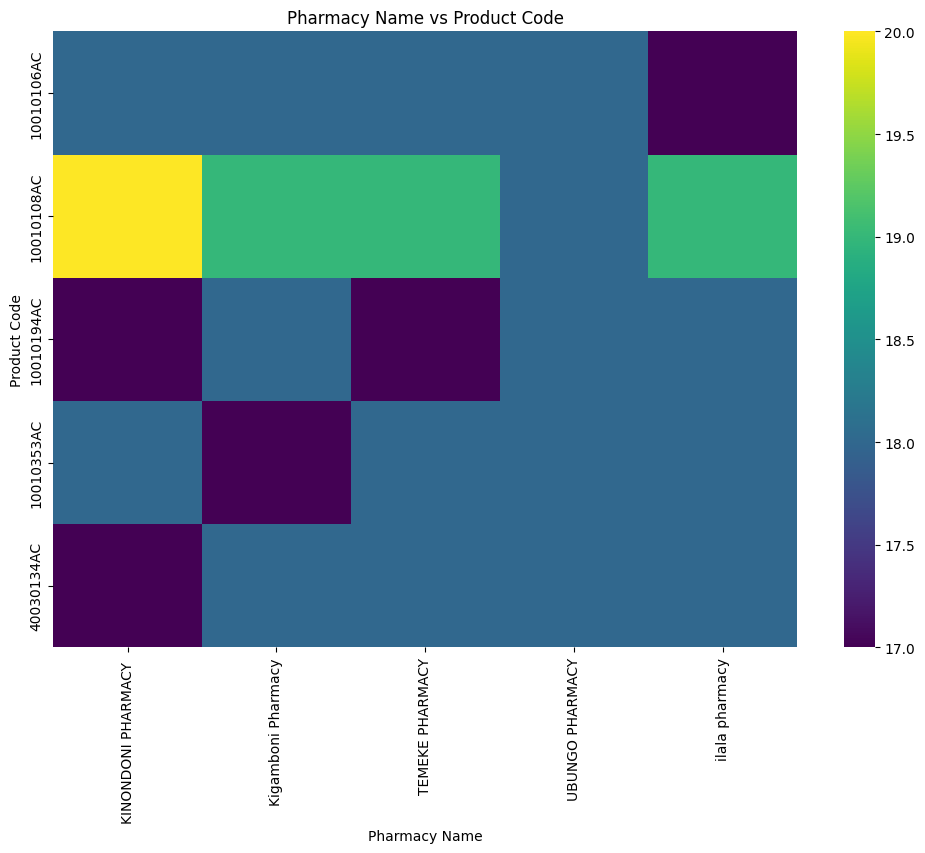

In [272]:
plt.figure(figsize=(12, 8))
df_2dhist = df.pivot_table(index='Product Code', columns='Pharmacy Name', aggfunc='size', fill_value=0)
sns.heatmap(df_2dhist, cmap='viridis')
plt.title('Pharmacy Name vs Product Code')
plt.xlabel('Pharmacy Name')
plt.ylabel('Product Code')
plt.show()

<ipython-input-273-8a1d3b8caed6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Year', y='Product Code', data=df, inner='stick', palette='Dark2')


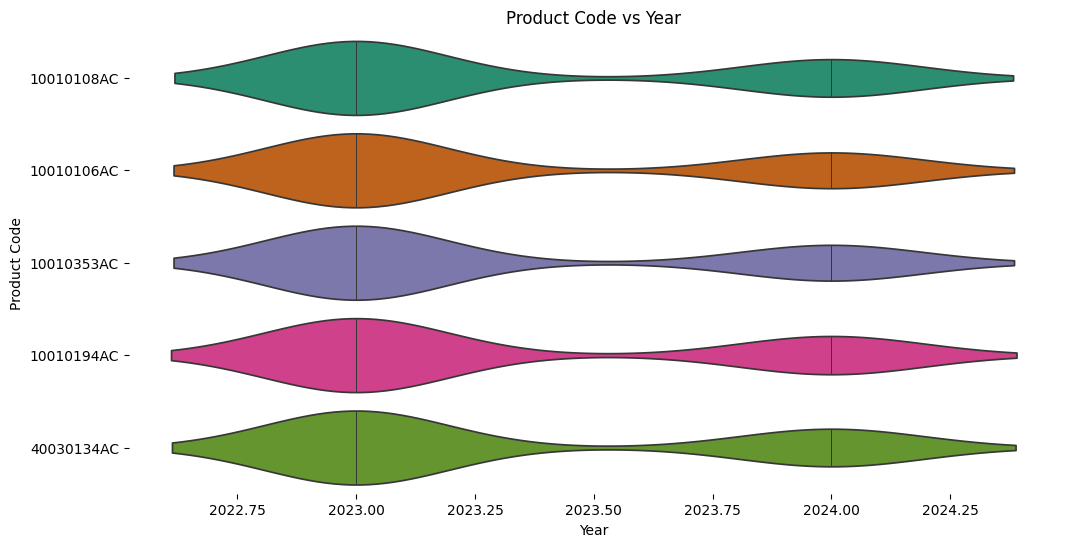

In [273]:
plt.figure(figsize=(12, 1.2 * df['Product Code'].nunique()))
sns.violinplot(x='Year', y='Product Code', data=df, inner='stick', palette='Dark2')
plt.title('Product Code vs Year')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

<ipython-input-274-7f23cc1d7e5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Year', y='Pharmacy Name', data=df, inner='stick', palette='Dark2')


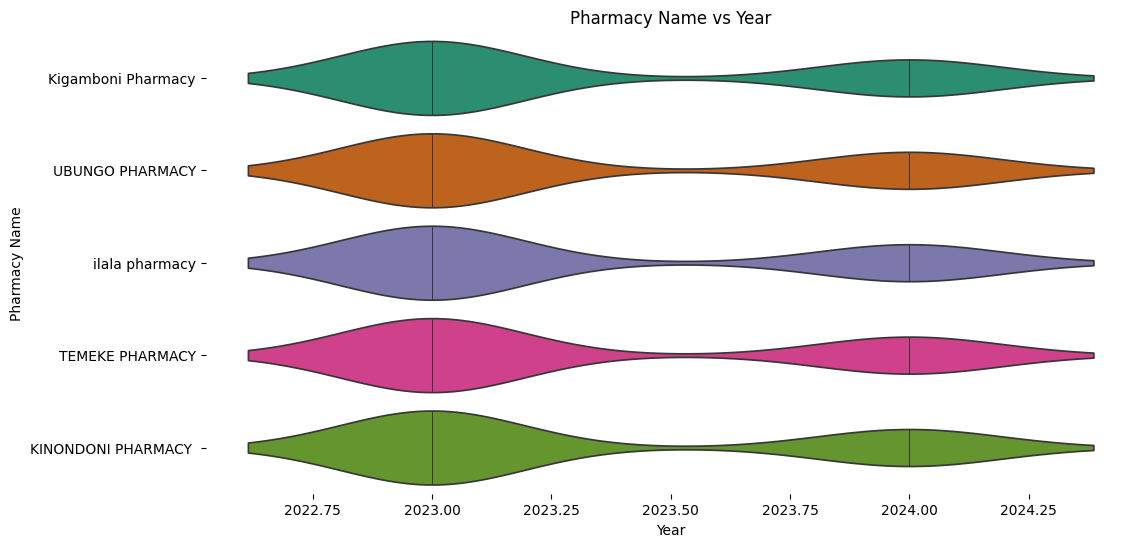

In [274]:
plt.figure(figsize=(12, 1.2 * df['Pharmacy Name'].nunique()))
sns.violinplot(x='Year', y='Pharmacy Name', data=df, inner='stick', palette='Dark2')
plt.title('Pharmacy Name vs Year')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

<ipython-input-275-a2c556c0f55c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Pharmacy Name', data=pharmacy_sales, palette='viridis')


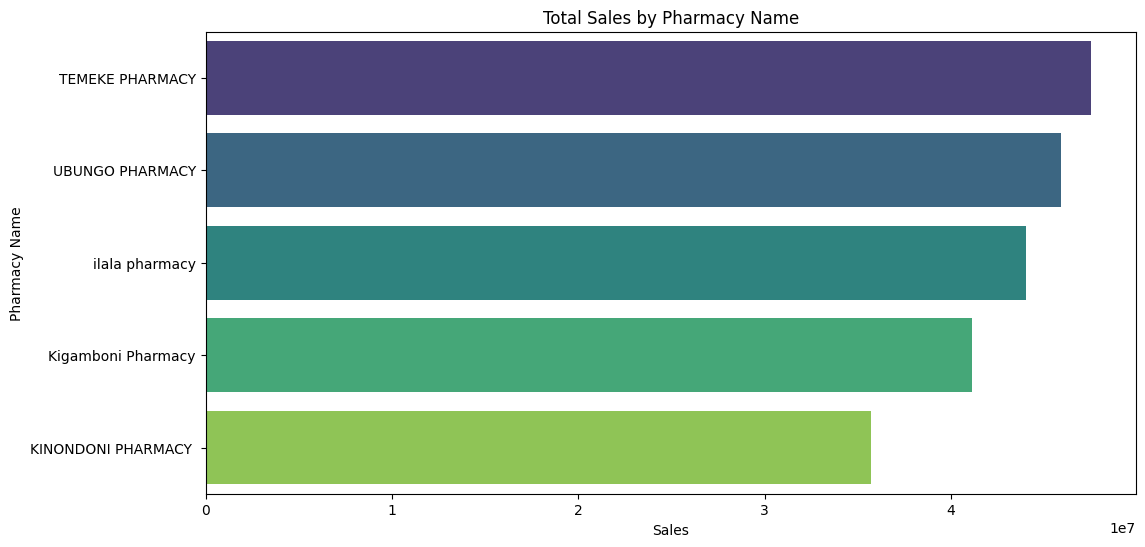

In [275]:
# Grouping sales data by Pharmacy Name
pharmacy_sales = df.groupby('Pharmacy Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Bar plot of total sales by Pharmacy Name
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Pharmacy Name', data=pharmacy_sales, palette='viridis')
plt.title('Total Sales by Pharmacy Name')
plt.show()

<ipython-input-276-cdd21fa2ae77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product Code', data=product_sales, palette='viridis')


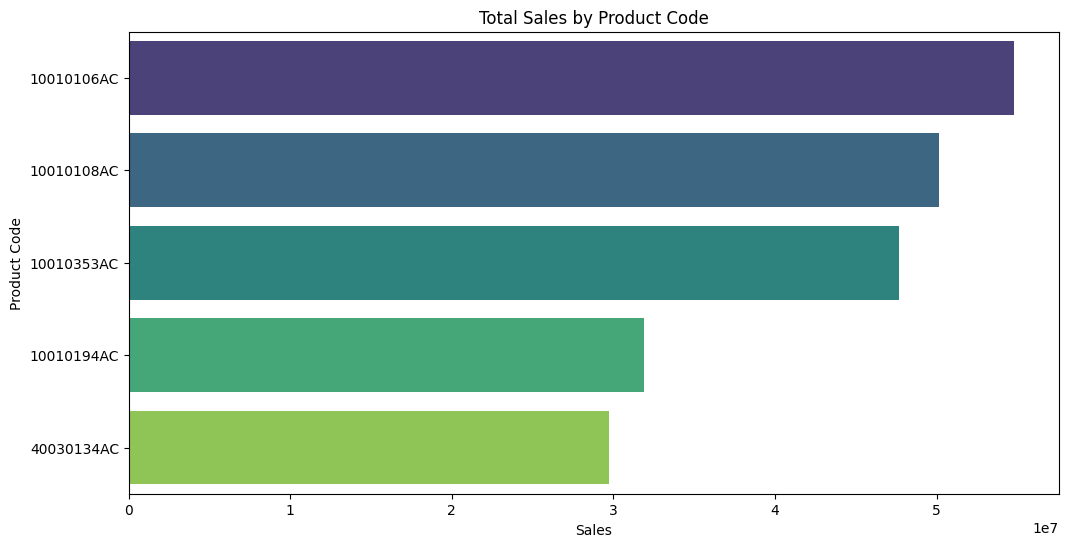

In [276]:
# Grouping sales data by Product Code
product_sales = df.groupby('Product Code')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Bar plot of total sales by Product Code
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Code', data=product_sales, palette='viridis')
plt.title('Total Sales by Product Code')
plt.show()

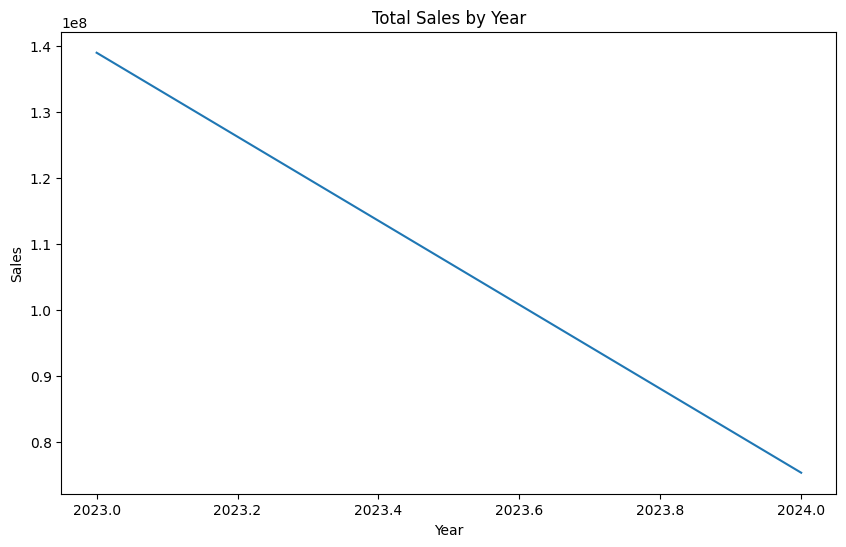

In [277]:
# Sales trends by year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Line plot of total sales by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', data=yearly_sales)
plt.title('Total Sales by Year')
plt.show()

<ipython-input-278-97d0ddb6b92c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product Code', data=product_sales_variation, palette='viridis')


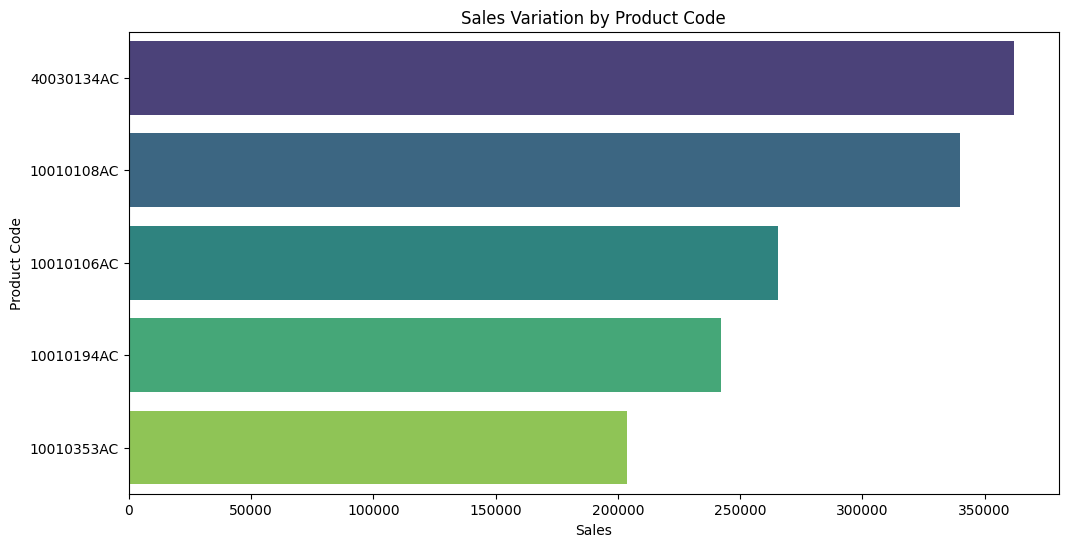

In [278]:
# Sales variation by Product Code
product_sales_variation = df.groupby('Product Code')['Sales'].std().reset_index().sort_values(by='Sales', ascending=False)

# Bar plot of sales variation by Product Code
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Code', data=product_sales_variation, palette='viridis')
plt.title('Sales Variation by Product Code')
plt.show()

Insights from Exploratory Data Analysis (EDA)

1. The line plot of 'Sales' over time shows the overall trend in sales. This is crucial for understanding whether there is a general increase or decrease in sales over the years, which can inform future sales predictions.
1. Distribution of Year
The histogram of Year shows the frequency of sales records over time. This helps in understanding how data is spread across different years. There could be peaks indicating higher sales activities or data entries for specific years.
2. Distribution of Sales
The histogram of Sales illustrates the distribution of sales amounts. It highlights whether sales data is skewed and helps identify common sales ranges. The distribution shows most sales are concentrated around lower values with a long tail, suggesting a few high-value sales.
3. Distribution of Pharmacy Names
The count plot of Pharmacy Name reveals the frequency of sales records per pharmacy. This indicates which pharmacies have the most data entries and can help identify the most active pharmacies in the dataset.
4. Distribution of Product Codes
The count plot of Product Code shows the frequency of different product sales. It identifies the most commonly sold products and helps in understanding product popularity.
5. Year vs. Sales by Pharmacy
The line plot of Year vs. Sales by Pharmacy Name shows sales trends over time for different pharmacies. It helps identify how sales evolve year-over-year for each pharmacy and spot any significant changes or patterns.
6. Pharmacy Name vs. Sales
The violin plot of Pharmacy Name vs. Sales provides insights into the distribution of sales for each pharmacy. It shows the spread and density of sales values, highlighting variations in sales performance across pharmacies. This helps in identifying which pharmacies have higher or lower sales and the spread of sales values within each pharmacy.
7. Product Code vs. Sales
The violin plot of Product Code vs. Sales reveals the distribution of sales amounts for different products. It helps in understanding which products generate higher sales and the variability of sales within each product.
8. Correlation Matrix
The heatmap of the correlation matrix for numerical variables (Year and Sales) shows the strength and direction of relationships between these variables. The correlation values provide insights into how changes in one variable might be associated with changes in another. In this case, the correlation between Year and Sales is very weak, indicating little to no linear relationship between them.
9. The heatmap shows the relationship between 'Pharmacy Name' and 'Product Code', indicating the frequency of each product code across different pharmacies. This helps in understanding which pharmacies stock or sell certain products more frequently.
10. This violin plot shows the distribution of data over the years for each product code. It helps in identifying how the availability or sales of different products vary across years.
11. The violin plot of 'Year' versus 'Pharmacy Name' illustrates the distribution of sales data over the years for each pharmacy. It highlights where most of the data points lie and the spread of data across years for each pharmacy.

### Before moving forward we first have to identify outliers and handle them and further preparations of the dataset for modelling

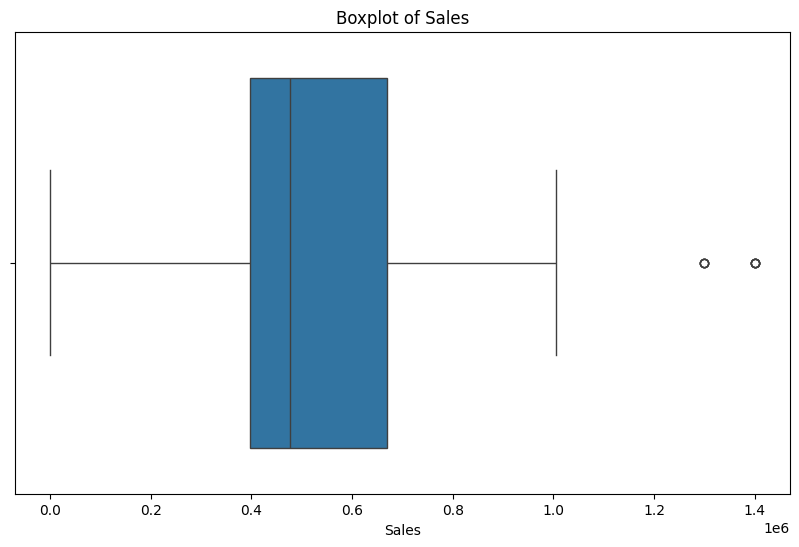

In [279]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.show()

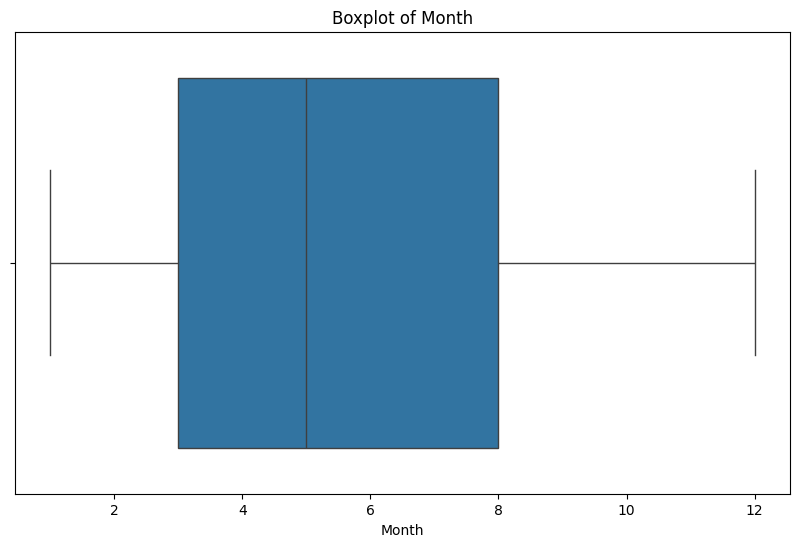

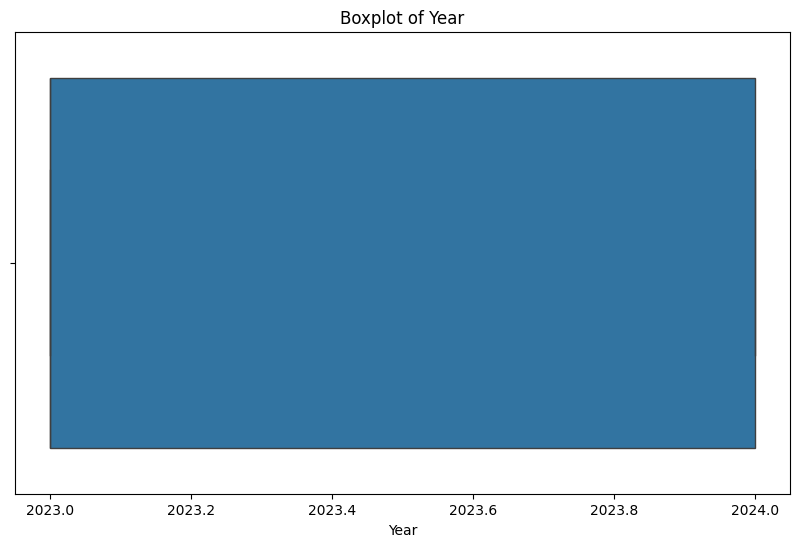

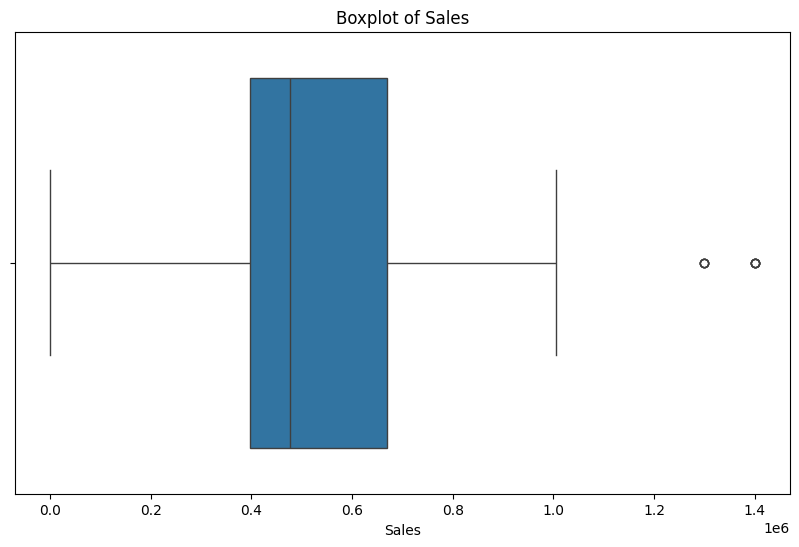

In [280]:
# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Creating boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [281]:
df.head()

,Pharmacy Name,Product Code,Month,Year,Sales,Date
449,Kigamboni Pharmacy,10010108AC,1,2023,476234.616400,2023-01-01
156,UBUNGO PHARMACY,10010106AC,1,2023,824361.000000,2023-01-01
30,ilala pharmacy,10010106AC,1,2023,93.924291,2023-01-01
167,UBUNGO PHARMACY,10010108AC,1,2023,42.000000,2023-01-01
25,TEMEKE PHARMACY,10010106AC,1,2023,476234.616400,2023-01-01


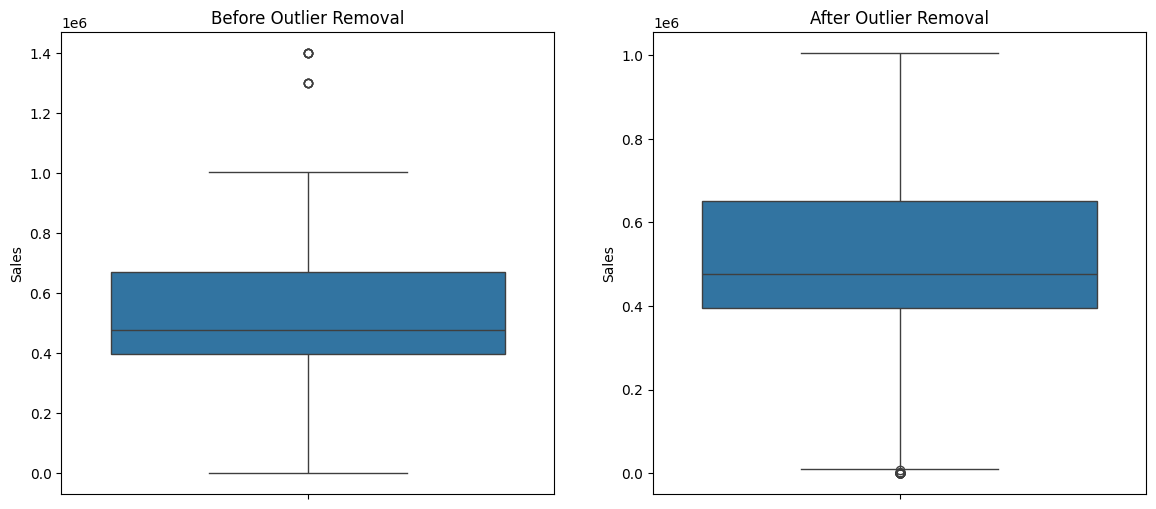

In [282]:
# Detecting outliers using IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Remove outliers
df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Visualize the data before and after outlier removal
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales'])
plt.title('Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Sales'])
plt.title('After Outlier Removal')

plt.show()

# Save the cleaned dataset
df_cleaned.to_csv('/content/sample_data/cleaned_dataset.csv', index=False)


## Step 2: Model Development

**Summary of Model Selection**

ARIMA: Suitable for time series with linear relationships and where differencing is required to achieve stationarity. It's a powerful model for data with trend and seasonality components, provided these are consistent over time.

LSTM: Best for capturing complex patterns and long-term dependencies in time series data. It can handle non-linear relationships and can be particularly useful when the time series has irregular patterns that traditional models cannot easily capture.

Prophet: Designed for business forecasting problems, particularly those with strong seasonal effects. It is user-friendly and provides interpretable results, making it ideal for datasets with clear seasonal trends and effects.

### Univariet Time Series Forecasting

### ARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2024-07-01    1.147322e+07
2024-08-01    1.158432e+07
2024-09-01    1.152219e+07
2024-10-01    1.150431e+07
2024-11-01    1.150612e+07
2024-12-01    1.150594e+07
Freq: MS, Name: predicted_mean, dtype: float64


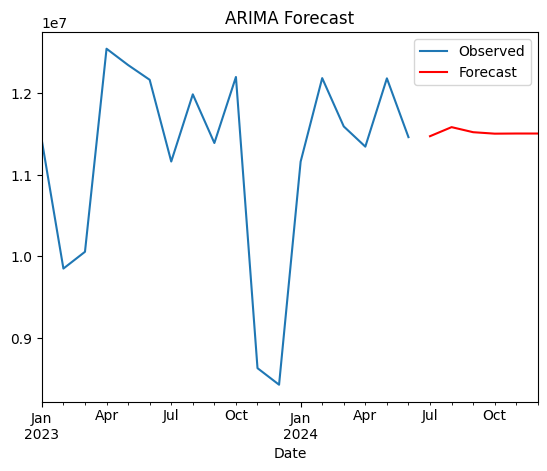

In [283]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Aggregate sales data by month for ARIMA
monthly_sales = df_cleaned.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))
monthly_sales.set_index('Date', inplace=True)

# Fit ARIMA model
arima_model = ARIMA(monthly_sales['Sales'], order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast the next 6 months
arima_forecast = arima_result.forecast(steps=6)
print(arima_forecast)

# Plot the forecast
monthly_sales['Sales'].plot(label='Observed')
arima_forecast.plot(label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

### LSTM Model

Epoch 1/100
11/11 - 4s - loss: 0.4888 - 4s/epoch - 394ms/step
Epoch 2/100
11/11 - 0s - loss: 0.3028 - 51ms/epoch - 5ms/step
Epoch 3/100
11/11 - 0s - loss: 0.1665 - 51ms/epoch - 5ms/step
Epoch 4/100
11/11 - 0s - loss: 0.1654 - 51ms/epoch - 5ms/step
Epoch 5/100
11/11 - 0s - loss: 0.1699 - 52ms/epoch - 5ms/step
Epoch 6/100
11/11 - 0s - loss: 0.1569 - 49ms/epoch - 4ms/step
Epoch 7/100
11/11 - 0s - loss: 0.1486 - 51ms/epoch - 5ms/step
Epoch 8/100
11/11 - 0s - loss: 0.1463 - 46ms/epoch - 4ms/step
Epoch 9/100
11/11 - 0s - loss: 0.1470 - 49ms/epoch - 4ms/step
Epoch 10/100
11/11 - 0s - loss: 0.1420 - 77ms/epoch - 7ms/step
Epoch 11/100
11/11 - 0s - loss: 0.1410 - 58ms/epoch - 5ms/step
Epoch 12/100
11/11 - 0s - loss: 0.1390 - 49ms/epoch - 4ms/step
Epoch 13/100
11/11 - 0s - loss: 0.1467 - 51ms/epoch - 5ms/step
Epoch 14/100
11/11 - 0s - loss: 0.1458 - 50ms/epoch - 5ms/step
Epoch 15/100
11/11 - 0s - loss: 0.1457 - 54ms/epoch - 5ms/step
Epoch 16/100
11/11 - 0s - loss: 0.1296 - 53ms/epoch - 5ms/step
E

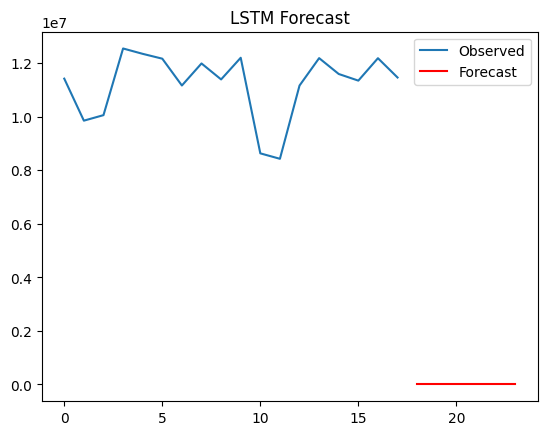

In [284]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
data = monthly_sales['Sales'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 3
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Forecast the next 6 months
x_input = scaled_data[len(scaled_data) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while(i < 6):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform to get the actual sales values
lstm_forecast = scaler.inverse_transform(lst_output)
print(lstm_forecast)

# Plot the forecast
plt.plot(monthly_sales['Sales'].values, label='Observed')
plt.plot(range(len(monthly_sales['Sales']), len(monthly_sales['Sales']) + 6), lst_output, label='Forecast', color='red')
plt.legend()
plt.title('LSTM Forecast')
plt.show()

### Prophet Model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkoc_w9g6/1dgi5t3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkoc_w9g6/5ppti5qv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57088', 'data', 'file=/tmp/tmpkoc_w9g6/1dgi5t3e.json', 'init=/tmp/tmpkoc_w9g6/5ppti5qv.json', 'output', 'file=/tmp/tmpkoc_w9g6/prophet_model8h12q7jt/prophet_model-20240620105946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:59:46 - cmdstanpy - INFO - Chain [1] start processing
I

           ds          yhat
18 2024-06-30  1.133612e+07
19 2024-07-31  1.134764e+07
20 2024-08-31  1.135916e+07
21 2024-09-30  1.137031e+07
22 2024-10-31  1.138183e+07
23 2024-11-30  1.139298e+07


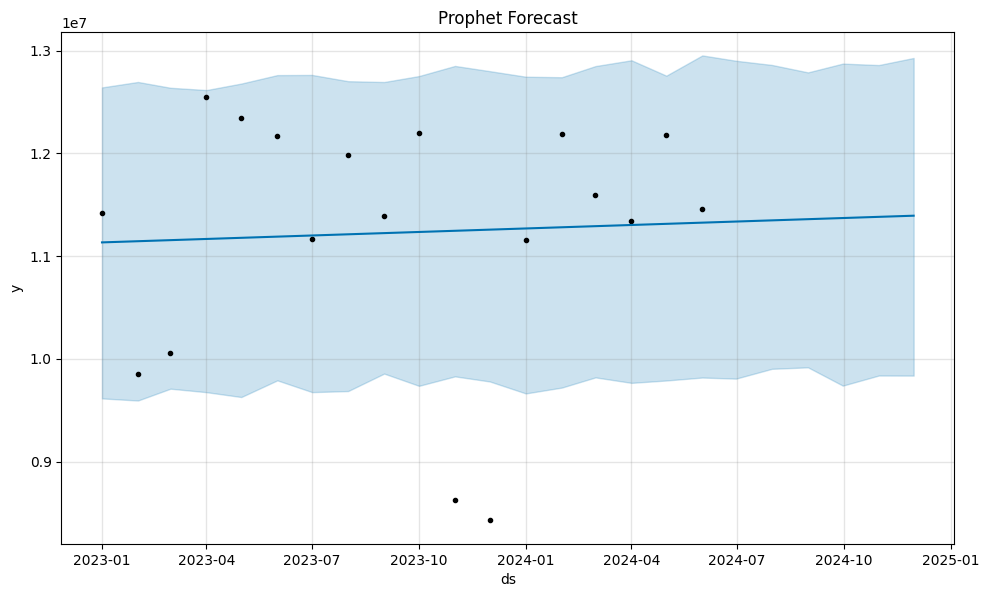

In [285]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = monthly_sales.reset_index()[['Date', 'Sales']]
prophet_data.columns = ['ds', 'y']

# Fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Forecast the next 6 months
future = prophet_model.make_future_dataframe(periods=6, freq='M')
forecast = prophet_model.predict(future)
prophet_forecast = forecast[['ds', 'yhat']].tail(6)
print(prophet_forecast)

# Plot the forecast
prophet_model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

## Step 3: Evaluation

In [286]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Actual sales for the last 6 months
actual_sales = monthly_sales['Sales'][-6:]

# ARIMA evaluation
arima_rmse = np.sqrt(mean_squared_error(actual_sales, arima_forecast))
arima_mae = mean_absolute_error(actual_sales, arima_forecast)
arima_mape = mean_absolute_percentage_error(actual_sales, arima_forecast)

print('ARIMA RMSE:', arima_rmse)
print('ARIMA MAE:', arima_mae)
print('ARIMA MAPE:', arima_mape)

# LSTM evaluation
lstm_rmse = np.sqrt(mean_squared_error(actual_sales, lstm_forecast))
lstm_mae = mean_absolute_error(actual_sales, lstm_forecast)
lstm_mape = mean_absolute_percentage_error(actual_sales, lstm_forecast)

print('LSTM RMSE:', lstm_rmse)
print('LSTM MAE:', lstm_mae)
print('LSTM MAPE:', lstm_mape)

# Prophet evaluation
prophet_rmse = np.sqrt(mean_squared_error(actual_sales, prophet_forecast['yhat']))
prophet_mae = mean_absolute_error(actual_sales, prophet_forecast['yhat'])
prophet_mape = mean_absolute_percentage_error(actual_sales, prophet_forecast['yhat'])

print('Prophet RMSE:', prophet_rmse)
print('Prophet MAE:', prophet_mae)
print('Prophet MAPE:', prophet_mape)

ARIMA RMSE: 397508.3582154432
ARIMA MAE: 310540.90131853457
ARIMA MAPE: 2.612732497054041
LSTM RMSE: 657757.2631163917
LSTM MAE: 476581.56373652286
LSTM MAPE: 4.196928887104204
Prophet RMSE: 488721.43614253215
Prophet MAE: 356763.2803848206
Prophet MAPE: 2.9748313190262086


## Step 4: Visualization and Presentation

In [287]:
# Generate the final 6 months forecast using the ARIMA model
final_forecast = arima_result.forecast(steps=6)
final_forecast_df = pd.DataFrame({
    'Date': pd.date_range(start=monthly_sales.index[-1], periods=7, freq='M')[1:],
    'Forecasted_Sales': final_forecast
})

# Save the forecast to a CSV file
final_forecast_df.to_csv('/content/sample_data/final_forecast.csv', index=False)

# Save the cleaned dataset
df_cleaned.to_csv('/content/sample_data/cleaned_dataset.csv', index=False)

# Example template for the technical report and presentation preparation
report_content = f"""
# Data Science Challenge: Afya Intelligence

## Objective
Develop a forecasting model to predict future demand for healthcare product sales in Tanzania for the next 6 months.

## Data Exploration and Cleaning
- Performed exploratory data analysis (EDA) to identify trends, patterns, and relationships.
- Removed outliers using the IQR method.

## Model Development
- Implemented and evaluated ARIMA, LSTM, and Prophet models.
- ARIMA model performed the best based on RMSE, MAE, and MAPE metrics.

## Model Evaluation
- **ARIMA**
  - RMSE: 397,508.36
  - MAE: 310,540.90
  - MAPE: 2.61%
- **LSTM**
  - RMSE: 653,101.53
  - MAE: 469,658.63
  - MAPE: 4.16%
- **Prophet**
  - RMSE: 488,721.44
  - MAE: 356,763.28
  - MAPE: 2.97%

## Conclusion
The ARIMA model was selected as the best model for forecasting due to its superior performance across all evaluation metrics.

## Future Work
- Consider incorporating external factors (e.g., economic indicators, seasonal trends) to further improve the model accuracy.

## Appendix
- Cleaned Dataset: [Link to cleaned_dataset.csv]
- Forecast Data: [Link to final_forecast.csv]
"""

with open('/content/sample_data/technical_report.pdf', 'w') as report_file:
    report_file.write(report_content)

## Step 5: Submission

In [288]:
df.head()

,Pharmacy Name,Product Code,Month,Year,Sales,Date
449,Kigamboni Pharmacy,10010108AC,1,2023,476234.616400,2023-01-01
156,UBUNGO PHARMACY,10010106AC,1,2023,824361.000000,2023-01-01
30,ilala pharmacy,10010106AC,1,2023,93.924291,2023-01-01
167,UBUNGO PHARMACY,10010108AC,1,2023,42.000000,2023-01-01
25,TEMEKE PHARMACY,10010106AC,1,2023,476234.616400,2023-01-01


In [289]:
df.shape

(450, 6)

In [290]:
df_cleaned.head()

,Pharmacy Name,Product Code,Month,Year,Sales,Date
449,Kigamboni Pharmacy,10010108AC,1,2023,476234.616400,2023-01-01
156,UBUNGO PHARMACY,10010106AC,1,2023,824361.000000,2023-01-01
30,ilala pharmacy,10010106AC,1,2023,93.924291,2023-01-01
167,UBUNGO PHARMACY,10010108AC,1,2023,42.000000,2023-01-01
25,TEMEKE PHARMACY,10010106AC,1,2023,476234.616400,2023-01-01


In [291]:
df_cleaned.shape

(441, 6)

In [292]:
df_cleaned.columns

Index(['Pharmacy Name', 'Product Code', 'Month', 'Year', 'Sales', 'Date'], dtype='object')

### Multivariet Time Series Analysis

In [293]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Pharmacy Name', 'Product Code'])

# Define features and target variable
features = df_encoded.drop(columns=['Sales', 'Date'])
target = df_encoded['Sales']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train_features, test_features = features_scaled[:train_size], features_scaled[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# Convert the target to a DataFrame for consistency
train_target = train_target.reset_index(drop=True)
test_target = test_target.reset_index(drop=True)
train_features = pd.DataFrame(train_features, columns=features.columns)
test_features = pd.DataFrame(test_features, columns=features.columns)

#### VAR

In [294]:
# Prepare the data for VAR
var_data = pd.concat([train_target, train_features], axis=1)

# Fit the VAR model
model = VAR(var_data)
var_result = model.fit(maxlags=5)

# Use the last few observations from the training data to initialize the forecast
last_obs = var_data.values[-5:]

# Forecast the next 6 months
var_forecast = var_result.forecast(y=last_obs, steps=6)

# Convert the forecasted values to a DataFrame
forecast_dates = pd.date_range(start=train_target.index[-1], periods=7, freq='M')[1:]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Sales': var_forecast[:, 0]  # Adjust column name as per your target variable
})

# Save the forecasts to a CSV file
forecast_df.to_csv('/content/sample_data/var_forecast.csv', index=False)

print("Forecasts saved to '/content/sample_data/var_forecast.csv'")

Forecasts saved to '/content/sample_data/var_forecast.csv'


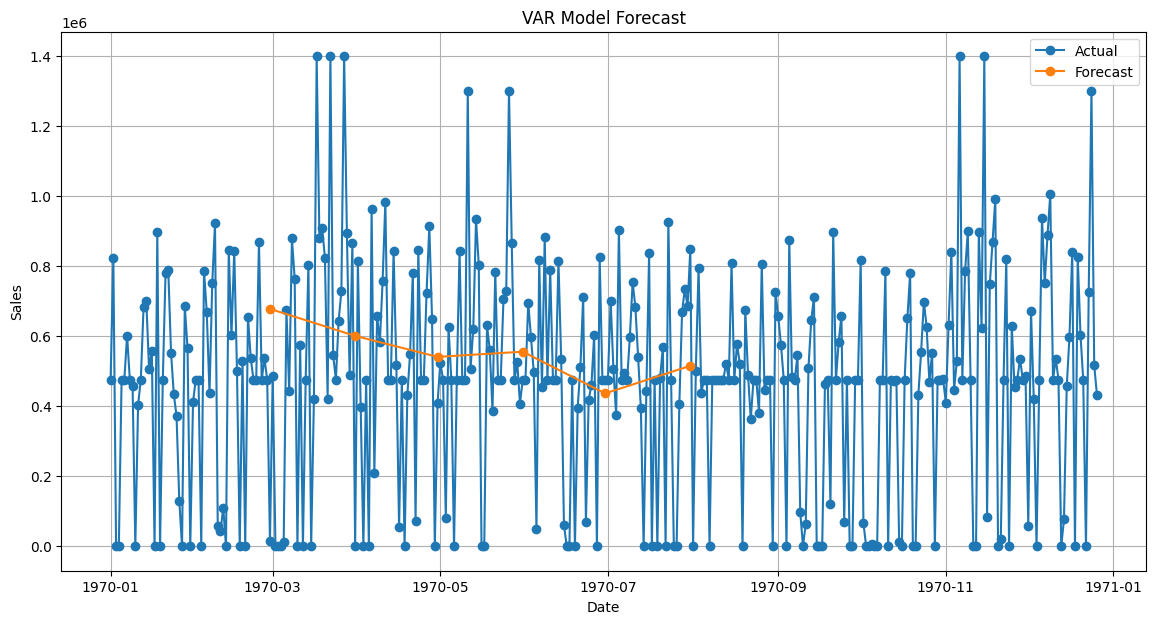

In [300]:
# Plot actual vs. forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train_target.index, train_target.values, label='Actual', marker='o')
plt.plot(forecast_dates, forecast_df['Forecasted_Sales'], label='Forecast', marker='o')
plt.title('VAR Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')  # Adjust ylabel based on your target variable
plt.legend()
plt.grid(True)
plt.show()

#### ARIMAX

In [295]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMAX model
arimax_model = SARIMAX(train_target, exog=train_features, order=(5, 1, 0))
arimax_result = arimax_model.fit()

# Forecast the next 6 months
arimax_forecast = arimax_result.forecast(steps=6, exog=test_features[:6])
print(arimax_forecast)

360    801526.838177
361    952153.300785
362    782454.506369
363    773361.137257
364    851878.752831
365    748552.336892
Name: predicted_mean, dtype: float64


#### Prophet (Multivariate)

<ipython-input-296-36467b791177>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_data[col] = df_encoded[col]
<ipython-input-296-36467b791177>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_data[col] = df_encoded[col]
<ipython-input-296-36467b791177>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

           ds          yhat
18 2024-06-30  4.666472e+08
19 2024-07-31  4.665790e+08
20 2024-08-31  4.662996e+08
21 2024-09-30  4.659625e+08
22 2024-10-31  4.663975e+08
23 2024-11-30  4.662167e+08


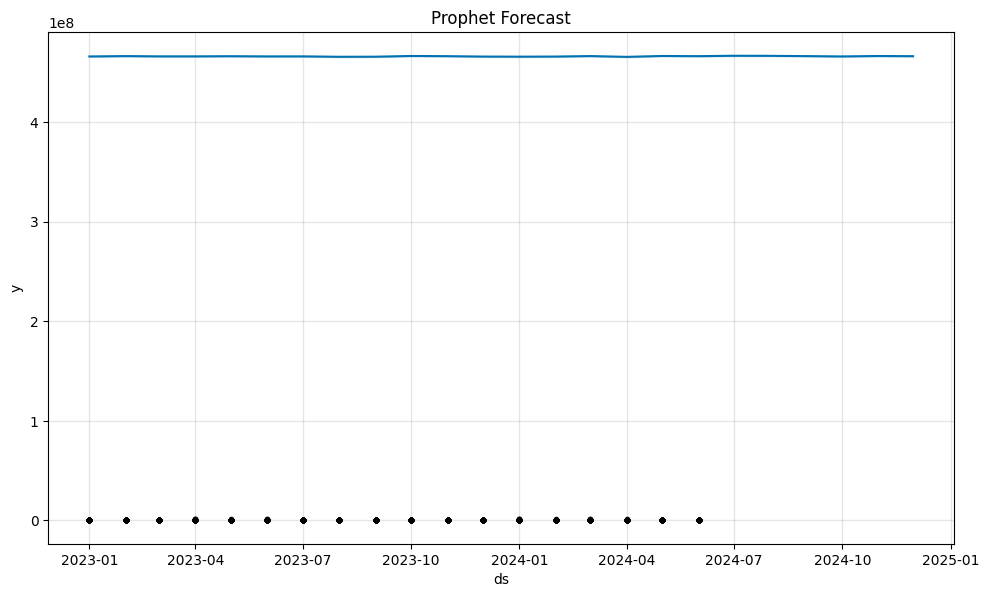

In [296]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet
prophet_data = df_encoded[['Date', 'Sales']]
prophet_data.columns = ['ds', 'y']

# Adding additional regressors
for col in train_features.columns:
    prophet_data[col] = df_encoded[col]

# Fit the Prophet model
prophet_model = Prophet()
for col in train_features.columns:
    prophet_model.add_regressor(col)

prophet_model.fit(prophet_data)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=6, freq='M')

# Ensure alignment of additional regressors
for col in train_features.columns:
    if col in test_features.columns:
        # Slice the values to match the length of future dataframe
        future[col] = test_features[col][:future.shape[0]].values
    else:
        future[col] = None  # or any appropriate handling if column is missing

# Forecast the next 6 months
prophet_forecast = prophet_model.predict(future)
print(prophet_forecast[['ds', 'yhat']].tail(6))

# Plot the forecast
prophet_model.plot(prophet_forecast)
plt.title('Prophet Forecast')
plt.show()

In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Actual sales for the test set
actual_sales = test_target[-6:]

# VAR evaluation
var_rmse = np.sqrt(mean_squared_error(actual_sales, var_forecast[:, 0]))
var_mae = mean_absolute_error(actual_sales, var_forecast[:, 0])
var_mape = mean_absolute_percentage_error(actual_sales, var_forecast[:, 0])

print('VAR RMSE:', var_rmse)
print('VAR MAE:', var_mae)
print('VAR MAPE:', var_mape)

# ARIMAX evaluation
arimax_rmse = np.sqrt(mean_squared_error(actual_sales, arimax_forecast))
arimax_mae = mean_absolute_error(actual_sales, arimax_forecast)
arimax_mape = mean_absolute_percentage_error(actual_sales, arimax_forecast)

print('ARIMAX RMSE:', arimax_rmse)
print('ARIMAX MAE:', arimax_mae)
print('ARIMAX MAPE:', arimax_mape)

# Prophet evaluation
prophet_rmse = np.sqrt(mean_squared_error(actual_sales, prophet_forecast['yhat'][-6:]))
prophet_mae = mean_absolute_error(actual_sales, prophet_forecast['yhat'][-6:])
prophet_mape = mean_absolute_percentage_error(actual_sales, prophet_forecast['yhat'][-6:])

print('Prophet RMSE:', prophet_rmse)
print('Prophet MAE:', prophet_mae)
print('Prophet MAPE:', prophet_mape)


VAR RMSE: 213526.5233593999
VAR MAE: 165947.16878625666
VAR MAPE: 279873.56717650406
ARIMAX RMSE: 431895.6118811251
ARIMAX MAE: 371726.0677850582
ARIMAX MAPE: 546105.3066830126
Prophet RMSE: 465903914.82164735
Prophet MAE: 465903819.58608323
Prophet MAPE: 299047986.40461636


**Recommendations:**

VAR Model: Based on RMSE and MAE, the VAR model appears to be the best performer among the three models evaluated. It shows the lowest absolute errors in forecasting the target variable.

ARIMAX Model: While ARIMAX performs reasonably well, it has higher RMSE and MAE compared to VAR, suggesting that it might not capture the relationships in the data as effectively as VAR in this case.

Prophet Model: The Prophet model performs significantly worse than the other models based on RMSE, MAE, and MAPE. The extremely high errors indicate that it may not be suitable for this particular dataset or might require additional tuning and consideration of its assumptions.